In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../Docs/DATA/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

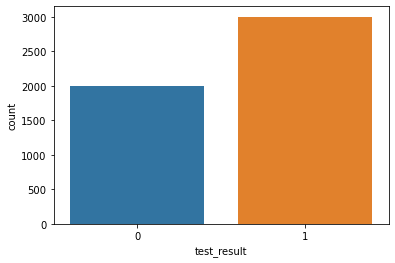

In [5]:
sns.countplot(
    data=df,
    x='test_result'

);

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

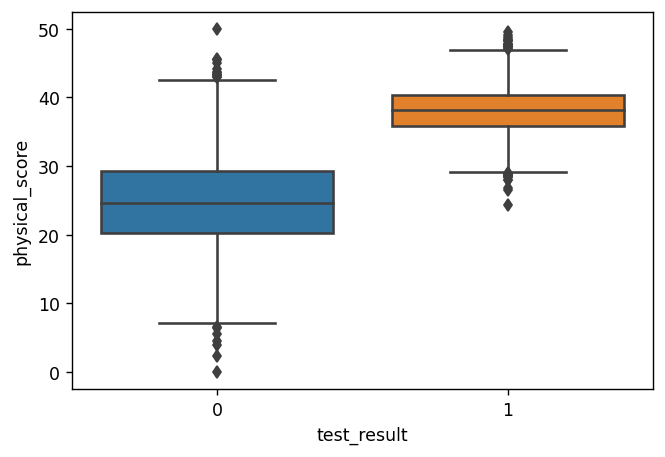

In [6]:
plt.figure(
    dpi=125
)
sns.boxplot(
    data=df,
    x='test_result',
    y='physical_score'
)

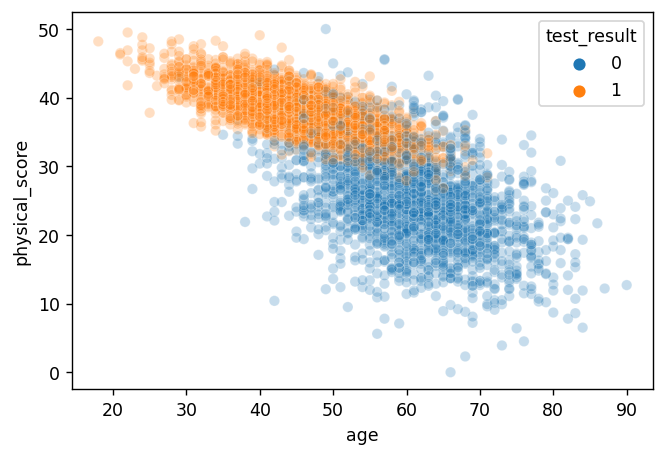

In [7]:
plt.figure(
    dpi=125
)
sns.scatterplot(
    data=df,
    x='age',
    y='physical_score',
    hue='test_result',
    alpha=0.25
);

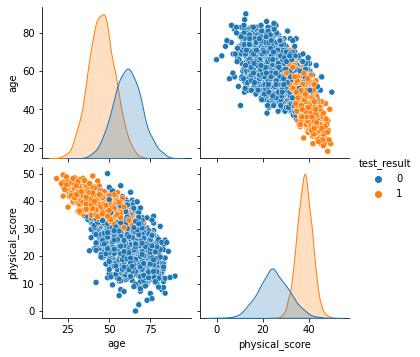

In [8]:
sns.pairplot(
    data=df,
    hue='test_result'
)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

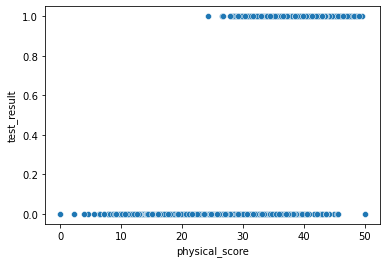

In [9]:
sns.scatterplot(
    x='physical_score',
    y='test_result',
    data=df
)

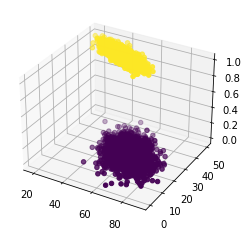

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    df['age'], 
    df['physical_score'], 
    df['test_result'], 
    c=df['test_result']
)

# Model Training

In [11]:
X=df.drop('test_result', axis=1)
y=df['test_result']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:
scaler=StandardScaler()

In [15]:
scaled_X_train=scaler.fit_transform(X_train)

In [16]:
scaled_X_test=scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_model=LogisticRegression()

In [19]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [20]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [21]:
# This will have value 0 or 1 because test_result can be 0 or 1.
# if the probability for 1 is greater than it shows 1 else 0.
y_pred=log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [22]:
# This shows the probability for 1 or 0.
y_pred=log_model.predict_proba(scaled_X_test)
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [23]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
y_pred=log_model.predict(scaled_X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.93

In [29]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [30]:
from sklearn.metrics import plot_confusion_matrix

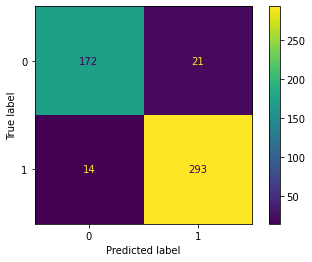

In [36]:
# if model is performming very well then the color difference is high.
plot_confusion_matrix(
    estimator=log_model, 
    X=scaled_X_test, 
    y_true=y_test
);

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [39]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

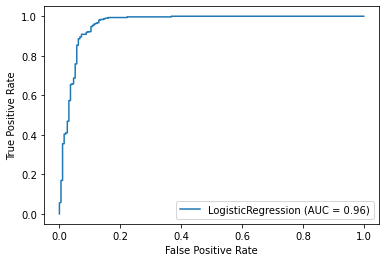

In [41]:
plot_roc_curve(
    estimator=log_model,
    X=scaled_X_test,
    y=y_test
)

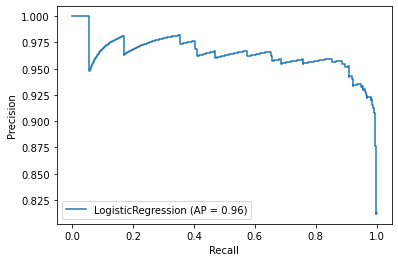

In [44]:
plot_precision_recall_curve(
    estimator=log_model,
    X=scaled_X_test,
    y=y_test
);